In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

from mpl_toolkits.mplot3d import Axes3D

In [2]:
import tensorflow

In [3]:
data = pd.read_csv(r'DNEdited_weekly_rigs_and_oil_price.csv')

d_time = data['Date'] #time
d_rigs = data['Rigs_Count'] #rigs count column, y, index: 0
d_price_WTI = data['WTI_Oil_Price'] #price column, x, index: 1
d_price_Brent = data['Brent_Oil_Price']

data.set_index('Date',inplace = True)

train = data.iloc[30:1000,[0,2]]
test = data.iloc[0:30,[0,2]]
train = pd.DataFrame(train)
test = pd.DataFrame(test)

train.set_index('WTI_Oil_Price',inplace = True)
test.set_index('WTI_Oil_Price',inplace = True)

In [4]:
#data.head()
#train.head()
train

,Rigs_Count
WTI_Oil_Price,
52.69,790
56.15,794
58.29,796
60.84,781
61.74,796
...,...
27.10,1266
26.50,1266
25.26,1278


In [5]:
train

,Rigs_Count
WTI_Oil_Price,
52.69,790
56.15,794
58.29,796
60.84,781
61.74,796
...,...
27.10,1266
26.50,1266
25.26,1278


C:\Users\thuyd\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

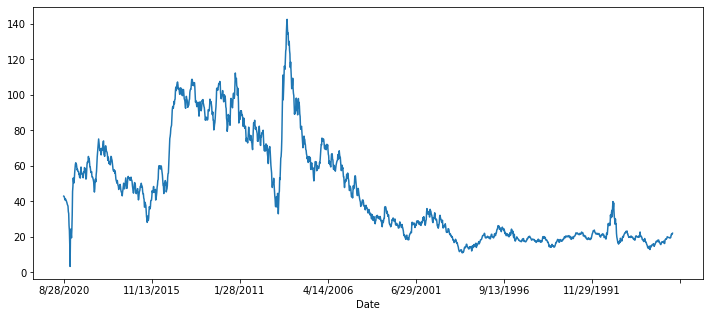

In [6]:
data['WTI_Oil_Price'].plot(figsize=(12,5))

C:\Users\thuyd\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

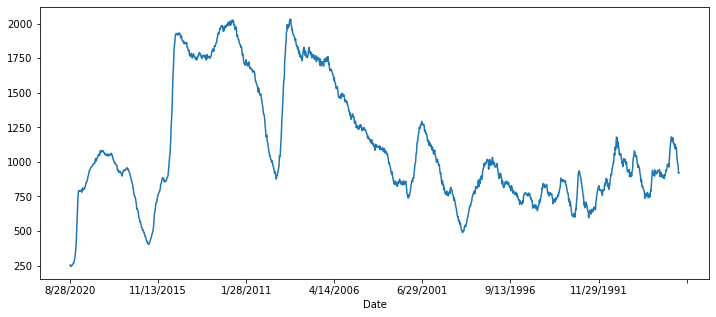

In [7]:
data['Rigs_Count'].plot(figsize=(12,5))

In [8]:
#Axes3D.scatter(d_price_WTI, d_rigs, zs=0, zdir='z', s=20, c=None, depthshade=True)

# d_time = data['Date'] #time
# d_rigs = data['Rigs_Count'] #rigs count column, y, index: 0
# d_price_WTI = data['WTI_Oil_Price'] #price column, x, index: 1
# d_price_Brent

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()#this is a must
scaler.fit(train)#scaler only takes dataframe intead of series

MinMaxScaler()

In [10]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [11]:
# df_scaled_train = pd.DataFrame(scaled_train)
# df_scaled_train.plot(figsize=(12,5))
# train.plot(figsize=(12,5))

In [12]:
from keras.preprocessing.sequence import TimeseriesGenerator #what is this

In [13]:
# define generator, equally spaced data rows
n_input = 30
n_features = 1
#batch size too large will overfit
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=4)

In [14]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.23724647 0.23970498 0.24093423 0.23171481 0.24093423 0.24646589
 0.25138291 0.24277812 0.24277812 0.244622   0.24523663 0.24708052
 0.25384143 0.25691457 0.26183159 0.27473878 0.27781192 0.2771973
 0.28027044 0.28518746 0.29625077 0.30362631 0.30731407 0.31468961
 0.32636755 0.32575292 0.33066994 0.33312846 0.33804548 0.340504
 0.23970498 0.24093423 0.23171481 0.24093423 0.24646589 0.25138291
 0.24277812 0.24277812 0.244622   0.24523663 0.24708052 0.25384143
 0.25691457 0.26183159 0.27473878 0.27781192 0.2771973  0.28027044
 0.28518746 0.29625077 0.30362631 0.30731407 0.31468961 0.32636755
 0.32575292 0.33066994 0.33312846 0.33804548 0.340504   0.34357714
 0.24093423 0.23171481 0.24093423 0.24646589 0.25138291 0.24277812
 0.24277812 0.244622   0.24523663 0.24708052 0.25384143 0.25691457
 0.26183159 0.27473878 0.27781192 0.2771973  0.28027044 0.28518746
 0.29625077 0.30362631 0.30731407 0.31468961 0.32636755 0.32575292
 0.33066994 0.33312846 0.33804548 0.340504   0.

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

In [16]:
n_input = 30
n_features = 1
#batch size too large will overfit
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=4)

In [17]:
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences = True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))

model.add(LSTM(100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(100))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 30, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 100)           80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 100)           80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               8

In [19]:
model.fit_generator(train_generator,epochs=83)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/83
235/235 [==============================] - 18s 76ms/step - loss: 0.0257
Epoch 2/83
235/235 [==============================] - 18s 75ms/step - loss: 0.0095
Epoch 3/83
235/235 [==============================] - 17s 73ms/step - loss: 0.0065
Epoch 4/83
235/235 [==============================] - 17s 73ms/step - loss: 0.0059
Epoch 5/83
235/235 [==============================] - 17s 72ms/step - loss: 0.0045
Epoch 6/83
235/235 [==============================] - 17s 71ms/step - loss: 0.0043
Epoch 7/83
235/235 [==============================] - 17s 72ms/step - loss: 0.0051
Epoch 8/83
235/235 [==============================] - 17s 73ms/step - loss: 0.0040
Epoch 9/83
235/235 [==============================] - 17s 73ms/step - loss: 0.0032
Epoch 10/83
235/235 [==============================] - 17s 73ms/step - loss: 0.0033
Epoch 11/83
235/235 [==============================] - 17s 73ms/step - loss: 0.0038
Epoch 12/

In [20]:
model.history.history.keys()

dict_keys(['loss'])

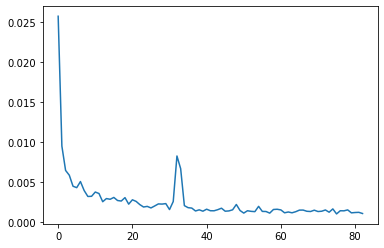

In [21]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

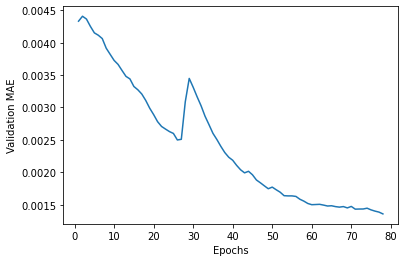

In [22]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(loss_per_epoch[5:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [23]:
# 10 history steps --> step 13
# last 10 points in train --> pt 1 in test data
first_eval_batch = scaled_train[-n_input:]

In [24]:
first_eval_batch

array([[0.27965581],
       [0.28580209],
       [0.27781192],
       [0.29440688],
       [0.2968654 ],
       [0.29379226],
       [0.30915796],
       [0.32206515],
       [0.33681623],
       [0.35771358],
       [0.36201598],
       [0.37246466],
       [0.40196681],
       [0.40503995],
       [0.42778119],
       [0.45298095],
       [0.45298095],
       [0.46957591],
       [0.48063921],
       [0.49047326],
       [0.49907806],
       [0.52120467],
       [0.52059004],
       [0.51505839],
       [0.51874616],
       [0.52980947],
       [0.52980947],
       [0.537185  ],
       [0.54640443],
       [0.53534112]])

In [25]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))# make it 3 dimensional

In [26]:
model.predict(first_eval_batch)

array([[0.53312993]], dtype=float32)

In [27]:
scaled_test[0]

array([-0.09219422])

In [28]:
test_predictions = []

# last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]

# reshape this to the format RNN wants(same format as TimeSeries Generator)
current_batch = first_eval_batch.reshape((1, n_input, n_features))

#how far into the future will I forecast?
#len(test) -->I can also change to 24

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [29]:
test_predictions

[array([0.53312993], dtype=float32),
 array([0.5302373], dtype=float32),
 array([0.525263], dtype=float32),
 array([0.51873344], dtype=float32),
 array([0.51072633], dtype=float32),
 array([0.5013535], dtype=float32),
 array([0.49065843], dtype=float32),
 array([0.47859988], dtype=float32),
 array([0.46508527], dtype=float32),
 array([0.4500224], dtype=float32),
 array([0.43321377], dtype=float32),
 array([0.41458127], dtype=float32),
 array([0.39413723], dtype=float32),
 array([0.3721965], dtype=float32),
 array([0.348867], dtype=float32),
 array([0.32394528], dtype=float32),
 array([0.29739827], dtype=float32),
 array([0.26981926], dtype=float32),
 array([0.24175608], dtype=float32),
 array([0.21352793], dtype=float32),
 array([0.18567164], dtype=float32),
 array([0.15886402], dtype=float32),
 array([0.13344133], dtype=float32),
 array([0.10944965], dtype=float32),
 array([0.08667332], dtype=float32),
 array([0.06506538], dtype=float32),
 array([0.04440033], dtype=float32),
 array([0

In [30]:
scaled_test

array([[-0.09219422],
       [-0.09219422],
       [-0.0983405 ],
       [-0.09649662],
       [-0.09403811],
       [-0.09403811],
       [-0.09280885],
       [-0.08973571],
       [-0.08666257],
       [-0.08543331],
       [-0.08481868],
       [-0.07682852],
       [-0.07375538],
       [-0.0633067 ],
       [-0.05285802],
       [-0.03995083],
       [-0.01843884],
       [ 0.00245851],
       [ 0.03749232],
       [ 0.07682852],
       [ 0.12169637],
       [ 0.15980332],
       [ 0.19913952],
       [ 0.22618316],
       [ 0.23847572],
       [ 0.23909035],
       [ 0.23724647],
       [ 0.23786109],
       [ 0.23724647],
       [ 0.23724647]])

In [31]:
true_predictions = scaler.inverse_transform(test_predictions)

In [32]:
true_predictions

array([[1271.40239692],
       [1266.6961149 ],
       [1258.60291964],
       [1247.97930986],
       [1234.95174325],
       [1219.7021482 ],
       [1202.30126926],
       [1182.68199852],
       [1160.69373107],
       [1136.18644387],
       [1108.83880442],
       [1078.5237247 ],
       [1045.2612789 ],
       [1009.56369823],
       [ 971.60660762],
       [ 931.05897689],
       [ 887.86698395],
       [ 842.99593544],
       [ 797.33714473],
       [ 751.40994661],
       [ 706.08776222],
       [ 662.47176266],
       [ 621.10904229],
       [ 582.07458839],
       [ 545.01749057],
       [ 509.86137962],
       [ 476.239344  ],
       [ 443.8409611 ],
       [ 412.62976766],
       [ 382.32933143]])

In [33]:
test['Predictions'] = true_predictions

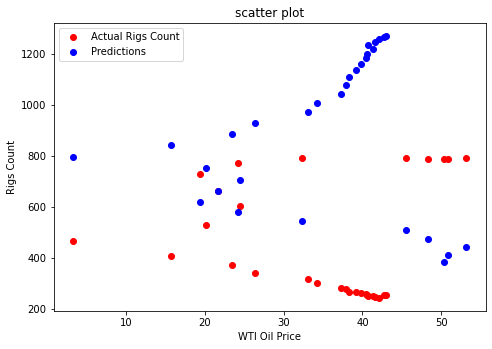

In [34]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
test_2 = test.reset_index()
ax.scatter(test_2['WTI_Oil_Price'], test_2['Rigs_Count'], color='r',label = "Actual Rigs Count")
ax.scatter(test_2['WTI_Oil_Price'], test_2['Predictions'], color='b', label = "Predictions")
ax.set_xlabel('WTI Oil Price')
ax.set_ylabel('Rigs Count')
ax.set_title('scatter plot')
plt.legend()
plt.show()